In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.load("./exp1_position_classification/split_samples_X.npy")
y = np.load("./exp1_position_classification/split_samples_y.npy")

In [52]:
avg_spectogram = np.zeros((5, X.shape[1]))
for i in range(5):
    avg_spectogram[i] = np.average(X[np.argwhere(y.flatten()==i+1).flatten()], axis=0)

In [39]:
avg_spectogram

array([[4.20261224e+05, 7.49077912e+05, 1.85266743e+06, ...,
        6.72768113e+02, 6.65968343e+02, 6.29918857e+02],
       [4.20261224e+05, 7.49077912e+05, 1.85266743e+06, ...,
        6.72768113e+02, 6.65968343e+02, 6.29918857e+02],
       [4.20261224e+05, 7.49077912e+05, 1.85266743e+06, ...,
        6.72768113e+02, 6.65968343e+02, 6.29918857e+02],
       [4.20261224e+05, 7.49077912e+05, 1.85266743e+06, ...,
        6.72768113e+02, 6.65968343e+02, 6.29918857e+02],
       [4.20261224e+05, 7.49077912e+05, 1.85266743e+06, ...,
        6.72768113e+02, 6.65968343e+02, 6.29918857e+02]])

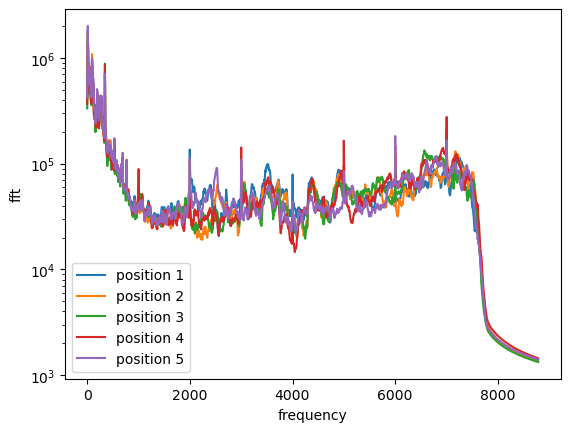

In [84]:
%matplotlib inline

sample_rate = 48000
freq = np.fft.rfftfreq(8192, d=1./sample_rate)


for i in range(5):
    plt.plot(freq[:1500], (avg_spectogram[i,:1500]), label=f"position {i+1}")

plt.yscale("log")
plt.ylabel("fft")
plt.xlabel("frequency")
plt.legend()

In [64]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [72]:
std_scl = StandardScaler()
X_data = X[:, :1300]
X_scaled = std_scl.fit_transform(np.log(X_data))

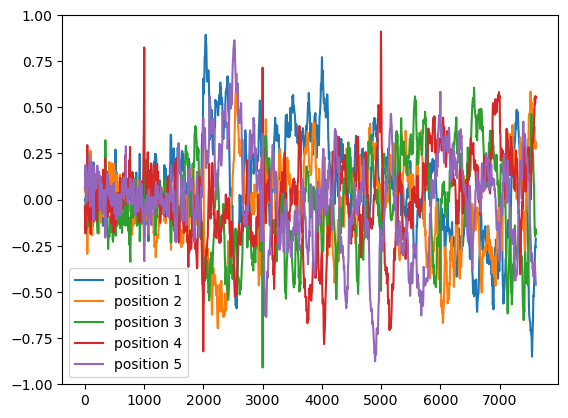

In [88]:
scaled_spect = np.zeros((5, X_scaled.shape[1]))
for i in range(5):
    scaled_spect[i] = np.average(X_scaled[np.argwhere(y.flatten()==i+1).flatten()], axis=0)

for i in range(5):
    plt.plot(freq[:1300],(scaled_spect[i]), label=f"position {i+1}")

plt.legend()

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_data, y.ravel(), test_size=0.33, random_state=42)

clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [86]:
clf.score(X_train, y_train)

1.0

In [87]:
clf.score(X_test, y_test)

0.9903047091412742

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
analysis = pca.fit_transform(X_scaled)

In [90]:
analysis.shape

(4375, 2)

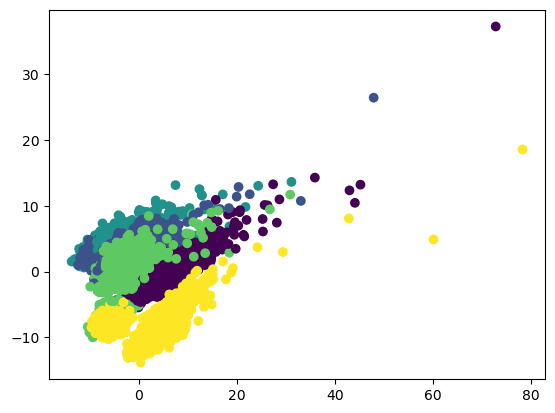

In [94]:
plt.scatter(analysis[:,0], analysis[:,1], c=y.ravel())

(-15.0, 15.0)

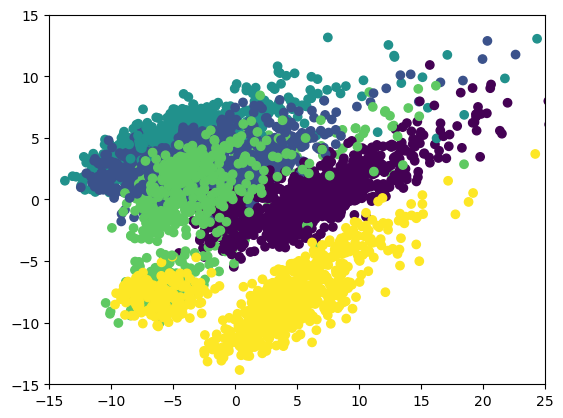

In [97]:
plt.scatter(analysis[:,0], analysis[:,1], c=y.ravel())
plt.xlim(-15,25)
plt.ylim(-15,15)

(-15.0, 15.0)

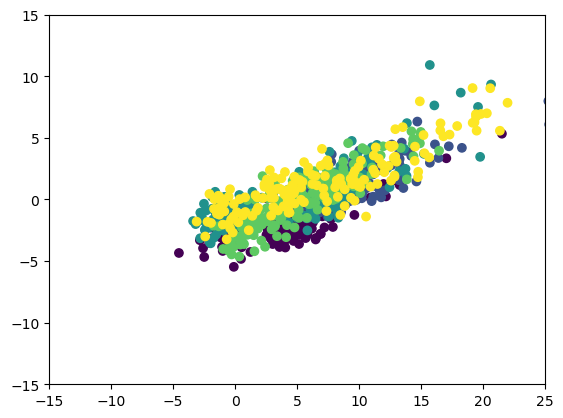

In [ ]:
class_1_pca = analysis[y.ravel()==1]
plt.scatter(class_1_pca[:,0], class_1_pca[:,1], c=np.arange(5).repeat(875/5))
plt.xlim(-5,25)
plt.ylim(-15,15)

In [99]:
class_1_pca.shape

(875, 2)

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data, np.arange(5).repeat(875), test_size=0.33, random_state=42)

clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train2, y_train2)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [110]:
clf.score(X_train2, y_train2)

1.0

In [111]:
clf.score(X_test2, y_test2)

0.9785318559556787

/tmp/ipykernel_13837/3248584591.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


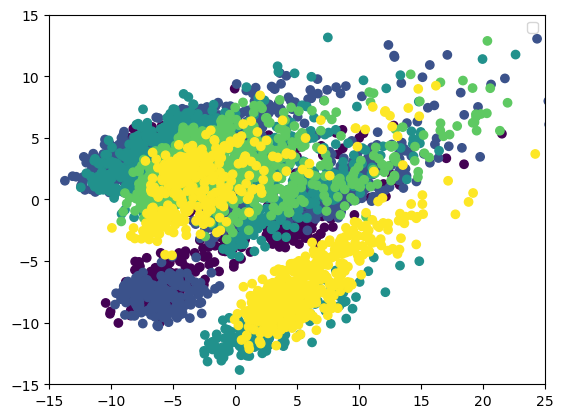

In [ ]:
plt.scatter(analysis[:,0], analysis[:,1], c=np.arange(5).repeat(875))
plt.xlim(-15,25)
plt.ylim(-15,15)

In [121]:
X_train3 = X_data[:-875]
y_train3 = y.ravel()[:-875]
X_test3 = X_data[-875:]
y_test3 = y.ravel()[-875:]

In [122]:
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train3, y_train3)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [123]:
clf.score(X_train3, y_train3)

1.0

In [124]:
clf.score(X_test3, y_test3)

0.9577142857142857